## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [90]:
import pandas as pd
import numpy as np
import random 
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42) 

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [91]:
df = pd.read_csv('ab_data.csv') 

In [92]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [93]:
df.group.unique()

array(['control', 'treatment'], dtype=object)

In [94]:
df.landing_page.unique()

array(['old_page', 'new_page'], dtype=object)

In [95]:
df.converted.unique()

array([0, 1])

b. Use the cell below to find the number of rows in the dataset.

In [96]:
f'Rows: {df.shape[0]}'

'Rows: 294478'

c. The number of unique users in the dataset.

In [97]:
unique_users = df.user_id.nunique()
f'No of uique users: {unique_users}'

'No of uique users: 290584'

d. The proportion of users converted.

In [98]:
#since it is just ones and zeros, we can just find the average of the converted column
prop_converts = df.converted.mean()
f'prop_converts: {prop_converts}'  

'prop_converts: 0.11965919355605512'

e. The number of times the `new_page` and `treatment` don't match.

In [99]:
mismatched_treatment = df.query('landing_page != "new_page" and group == "treatment"')
mismatched_control = df.query('landing_page == "new_page" and group != "treatment"')

In [100]:
mismatched = mismatched_treatment.shape[0] + mismatched_control.shape[0]
mismatched

3893

f. Do any of the rows have missing values?

In [101]:
df.isnull().any() 

user_id         False
timestamp       False
group           False
landing_page    False
converted       False
dtype: bool

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [102]:
df2=df.drop(mismatched_treatment.index)

In [103]:
df2= df2.drop(mismatched_control.index)

In [104]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [105]:
df2_unique_users = df2.user_id.nunique()
df2_unique_users

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [106]:
df2_duplicated_user = df2[df2.user_id.duplicated() == True]
df2_duplicated_user

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [107]:
print('Repeated user info:\n')
f' {df2_duplicated_user.values}'

Repeated user info:



" [[773192 '2017-01-14 02:55:59.590927' 'treatment' 'new_page' 0]]"

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [108]:
df2.drop(2893, axis=0, inplace=True) 

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [109]:
p_converted = (df2.converted==1).mean()
p_converted

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [110]:
p_converted_given_control = df2.query('group =="control"') 
p_converted_given_control = p_converted_given_control.converted.mean() 

In [111]:
f'Converted Given Control: {p_converted_given_control}' 

'Converted Given Control: 0.1203863045004612'

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [112]:
p_converted_given_treatment = df2.query('group == "treatment"')
p_converted_given_treatment = p_converted_given_treatment.converted.mean()

In [113]:
f'Converted Given Treatment: {p_converted_given_treatment}'

'Converted Given Treatment: 0.11880806551510564'

d. What is the probability that an individual received the new page?

In [114]:
p_newpage = (df['landing_page'] == 'new_page').mean()

In [115]:
f'Probability of a new page: {p_newpage}' 

'Probability of a new page: 0.5'

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

> ### ANswer

**From the probability results calculated from the above, it is obvious that there is just a little difference in the users converted in each group. There is no concrete evidence to state that the new treatment page leads to more conversions**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

$$h_o: p_{new} - p_{old}  <= 0 $$

$$h_1: p_{new} - p_{old} >0 $$ 
$$\alpha =0.05$$ 

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

In [116]:
sample = df2.sample(df2.shape[0], replace=True)
sample_mean = sample.converted.mean() 

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [117]:
p_new = sample_mean
p_new 

0.11936307573713625

b. What is the **conversion rate** for $p_{old}$  under the null? <br><br>

In [118]:
p_old = sample_mean
p_old

0.11936307573713625

c. What is $n_{new}$, the number of individuals in the treatment group?

In [119]:
n_new = df2.query('group == "treatment"').user_id.nunique()
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [120]:
n_old = df2.query('group == "control"').user_id.nunique()
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [121]:
def simul_new():
    new_page_converted = np.random.choice([0,1], p=[1-p_new , p_new], size= n_new)
    return new_page_converted

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [122]:
def simul_old():
    old_page_converted = np.random.choice([0,1], p=[1-p_old , p_old], size=n_old,)
    return old_page_converted

g. Find $p_{new} - p_{old}$ for your simulated values from part (e) and (f).

In [123]:
p_new = simul_new().mean()
p_new

0.11910398458468102

In [124]:
p_old = simul_old().mean()
p_old

0.11898206148381679

In [125]:
simulated_diff = p_new -p_old

In [126]:
f'simualted difference: {simulated_diff}'

'simualted difference: 0.00012192310086422964'

> ### Observation

##### From the result of the simulated  difference in new page and old page conversion rate, 
##### We are beginning to observe that our null hypothesis ``(where old page is better than new page)`` is likely to be true
##### But let's perform  bootstrapping to help us come up with enough statistical evidence to either decide whether or not to reject or fail to reject the null hypothesis

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**

In [127]:
p_diffs = []
for _ in range(10000):
    p_diffs.append(simul_new().mean() - simul_old().mean())
p_diffs = np.array(p_diffs) 

In [128]:
p_diffs

array([ 0.00136068,  0.00158099, -0.00075198, ..., -0.00105509,
        0.00047984, -0.00139249])

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

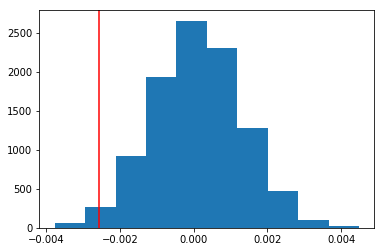

In [129]:
plt.hist(p_diffs);
plt.axvline(sampled_diff, color='r'); 

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [130]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [131]:
actual_control_conversion = df2.query('landing_page == "old_page"').converted.mean()
actual_treatment_conversion = df2.query('landing_page == "new_page"').converted.mean()

In [132]:
actual_diff = actual_treatment_conversion - actual_control_conversion

In [133]:
(p_diffs > actual_diff).mean()  

0.9173

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

##### Answer:
> ##### The value calculated above is known as the p-value. 

> ##### Our p-value is above our alpha value of 5%. 

> ##### Since we simuated from the null hypothesis 𝑝𝑛𝑒𝑤  - 𝑝𝑜𝑙𝑑 <= 0, we have enough evidence not to reject the null 
> ##### hypothesis that the Old Page is more likely to result in increased Conversion over the new page

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [134]:
df2.head(2)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0


In [135]:
import statsmodels.api as sm

convert_old = df2.query('landing_page == "old_page" and converted ==1').user_id.count()
convert_new = df2.query('landing_page == "new_page" and converted ==1').user_id.count()
n_old =  df2.query('landing_page == "old_page"').user_id.count()
n_new = df2.query('landing_page == "new_page"').user_id.count()

In [136]:
convert_old

17489

In [137]:
convert_new

17264

In [138]:
n_old

145274

In [139]:
n_new

145310

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [140]:
from statsmodels.stats.proportion import proportions_ztest as pz_test

In [141]:
counts = np.array([convert_old, convert_new])
nobs = np.array([n_old,n_new]) 
z_score, p_value =  pz_test(counts, nobs, alternative='smaller')

In [142]:
print(z_score, p_value)

1.31092419842 0.905058312759


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

> ### Answer

**The z-score tells us how many standard deviations from the null mean we are, and the p-value tells us the probability of getting this value or more extreme if the null is true.**

**In this case, the z-score means we are 1.31 standard deviations from the mean. Since the p-value is 0.905 and is greater than our alpha of 0.05, we can conclude that we should fail to reject the null hypothesis: the new landing page does not get better conversion rates than the old.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Answer**

**Logistic Regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [143]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [144]:
df2=df2.join(pd.get_dummies(df2['landing_page']))

In [145]:
df2.head(1)

,user_id,timestamp,group,landing_page,converted,new_page,old_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1


In [146]:
df2.drop('old_page', axis=1, inplace=True)

In [147]:
df2.rename(columns={'new_page':'ab_page'}, inplace=True)

In [148]:
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0


In [149]:
df2['intercept'] =1

c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [150]:
response = df2['converted']
predictors = df2[['intercept', 'ab_page']]

conversion_model = sm.Logit(response, predictors)
conversion_model_result = conversion_model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [151]:
conversion_model_result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-05-28 18:28 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

> ### Answer

***ab_page p-value = 0.1899.
In Part II, the p-value was 0.4935***

***The reason for the difference in p-values is that Part II tested whether the probability of conversion was different on the new page vs. the old page. I.e. The conversion rate is the same or better for the old page than the new page.***

***Here, in Part II, this p-value is looking at whether ab_page is a good predictor for conversions. I.e. the type of page (old vs. new) is not a good predictor of conversions.***

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

> ### Answer

**Considering other factors to add to our regression model is likely to imporove our prediction, and help us understand better factoes responsible for customer's conversion**


**The disadvantage associated with addiing new independent varibles to our prediction model is that it might lead to multicolinearity which can affect the correctness of our prediction**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [152]:
countries = pd.read_csv('countries.csv')

In [153]:
countries.head(2)

,user_id,country
0,834778,UK
1,928468,US


In [154]:
merged_df=df2.merge(countries, on='user_id', how='inner')

In [155]:
merged_df.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,US


In [156]:
merged_df.country.unique()

array(['US', 'CA', 'UK'], dtype=object)

In [157]:
merged_df = merged_df.join(pd.get_dummies(merged_df.country))

In [158]:
merged_df.head(1)

,user_id,timestamp,group,landing_page,converted,ab_page,intercept,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,US,0,0,1


In [159]:
merged_df.drop('country', axis=1, inplace=True)

In [160]:
merged_df.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,0,0,1


**_We would take 'CA' as our baseline for country_**

In [161]:
merged_df['intercept'] =1
response = merged_df['converted']
predictors = merged_df[['intercept','ab_page','UK','US']]

In [162]:
new_model = sm.Logit(response, predictors)
new_model_result = new_model.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [163]:
new_model_result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-05-28 18:28 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0300    0.0266  -76.2488  0.0000  -2.0822  -1.9778
ab_page       -0.0149    0.0114   -1.3069  0.1912  -0.0374   0.0075
UK             0.0506    0.0284    1.7835  0.0745  -0.0050   0.1063
US             0.0408    0.0269    1.5161  0.1295  -0.0119   0.0934
==================================================================

"""

> ### Observation

**it is evident that the country and page predictors are not statistically significant to predict if a customer would convert based on the new_page**

**Hence we fail to reject the null hypothesis that the old page is better than the new page**

**In the next steps below, I would be creating interaction to between page and country to check if they would offer statistical significance in predeicting conversion based on the nes page**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [164]:
# create interactions for each predictor country and page
merged_df['ab_US'] = merged_df.ab_page * merged_df.US
merged_df['ab_UK'] = merged_df.ab_page * merged_df.UK

In [165]:
response=merged_df['converted']
predictors = merged_df[['intercept','ab_US','ab_UK', 'ab_page', 'US', 'UK']]

In [166]:
new_model2 = sm.Logit(response, predictors)
new_model_result2 = new_model2.fit()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


In [167]:
new_model_result2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-05-28 18:28 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0040    0.0364  -55.0077  0.0000  -2.0754  -1.9326
ab_US          0.0469    0.0538    0.8718  0.3833  -0.0585   0.1523
ab_UK          0.0783    0.0568    1.3783  0.1681  -0.0330   0.1896
ab_page       -0.0674    0.0520   -1.2967  0.1947  -0.1694   0.0345
US             0.0175    0.0377    0.4652  0.6418  -0.0563   0.0914
UK             0.0118    0.0398    0.2957  0.7674  -0.0663   0.0899
==================================================================

"""

In [168]:
response = merged_df['converted']
predictors = merged_df[['intercept', 'ab_US','ab_UK']]

In [169]:
model3 = sm.Logit(response, predictors)
model3_result = model3.fit()

Optimization terminated successfully.
         Current function value: 0.366117
         Iterations 6


In [170]:
model3_result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-05-28 18:28 AIC:              212781.7674
No. Observations:   290584           BIC:              212813.5064
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9926    0.0079  -252.9104  0.0000  -2.0081  -1.9772
ab_US        -0.0144    0.0125    -1.1548  0.2482  -0.0389   0.0101
ab_UK         0.0112    0.0179     0.6256  0.5316  -0.0240   0.0464
==================================================================

"""

> ### Conclusion

***From the aboove models, It appears that we do not have the right predictors to predict if customer would convert based on the new page**


**Even with the interaction between pages and countries, we could not achieve enough statistical signifacnace from our preditors to predict if a customer converts or not based on the new page**

**Hence the old page is better than the new page**

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [171]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0